In [1]:
%matplotlib inline

100%|██████████| 42/42 [00:00<00:00, 45007.86it/s]


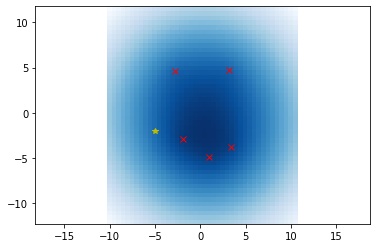

In [2]:
"""
2D gaussian grid map sample
author: Atsushi Sakai (@Atsushi_twi)
"""

import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from tqdm import tqdm
import random
from IPython.display import display

EXTEND_AREA = 15.0  # [m] grid map extention lengt


def generate_gaussian_grid_map(ox, oy, xyreso, std, victim):

    minx, miny, maxx, maxy, xw, yw = calc_grid_map_config(ox, oy, xyreso)
    gmap = [[0.0 for i in range(yw)] for i in range(xw)]
    num_victims = len(victim)

    for ix in tqdm(range(xw)):
        for iy in range(yw):
            x = ix * xyreso + minx
            y = iy * xyreso + miny
            probability = sum([ (1.0 - norm.cdf(math.hypot(iox - x, ioy - y), 0.0, std)) for (iox, ioy) in zip(ox, oy)])
            gmap[ix][iy] = probability

    gmap /= np.max(gmap)*1.001

    for ix in tqdm(range(xw)):
        for iy in range(yw):
            probability = gmap[ix][iy]
            roll = random.uniform(0.9, 1)
            if roll < probability and num_victims > 0:
                num_victims -= 1
                victim[num_victims] = [ix,iy]

    return gmap, minx, maxx, miny, maxy

def calc_grid_map_config(ox, oy, xyreso):
    minx = round(min(ox) - EXTEND_AREA / 2.0)
    miny = round(min(oy) - EXTEND_AREA / 2.0)
    maxx = round(max(ox) + EXTEND_AREA / 2.0)
    maxy = round(max(oy) + EXTEND_AREA / 2.0)
    xw = int(round((maxx - minx) / xyreso))
    yw = int(round((maxy - miny) / xyreso))
    return minx, miny, maxx, maxy, xw, yw


def draw_heatmap(data, minx, maxx, miny, maxy, xyreso, ax):
    x, y = np.mgrid[slice((minx - xyreso//2), (maxx + xyreso//2), xyreso),
                    slice((miny - xyreso//2), (maxy + xyreso//2), xyreso)]
    ax.pcolor(x, y, data, vmax=1.0, cmap=plt.cm.Blues)
    ax.axis("equal")


xyreso = 0.5  # xy grid resolution
STD = 25.0  # standard diviation for gaussian distribution

num_random_pts = 5
ox = (np.random.rand(num_random_pts) - 0.5) * 10.0
oy = (np.random.rand(num_random_pts) - 0.5) * 10.0
victim = [[]]
gmap, minx, maxx, miny, maxy = generate_gaussian_grid_map(
    ox, oy, xyreso, STD, victim)

fig, ax = plt.subplots()

draw_heatmap(gmap, minx, maxx, miny, maxy, xyreso, ax) # Plot heat map
ax.plot(ox, oy, "xr") # Plot all the points
for v in victim:
    ax.plot(v[0] * xyreso + minx, v[1] * xyreso + miny, "y*")
plt.show()

In [3]:
def find_argmax_2d_numpy(input_list):

    arr = np.array(input_list)
    flattened_index = np.argmax(arr)
    max_i, max_j = np.unravel_index(flattened_index, arr.shape)
    
    return max_i, max_j

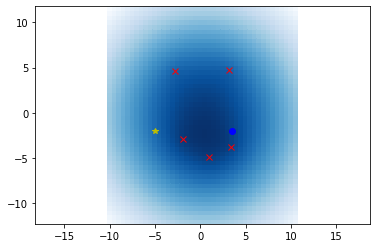

In [4]:
from matplotlib import animation
from tqdm import tqdm

currentx = random.randint(0, len(gmap))
currenty = random.randint(0, len(gmap[0]))

ax.plot(currentx * xyreso + minx, currenty * xyreso + miny, "ob")
display(fig)

f = 0.99

count = 0

while [currentx, currenty] not in victim:
    # While not found
    p = gmap[currentx][currenty]
    update = p*(1-f)/(1-p*f)
    if p > 1:
        print(p)
    if update > p:
        print(update, p)
    assert update < p
    gmap[currentx][currenty] = update

    x, y = find_argmax_2d_numpy(gmap)
    
    if x > currentx:
        currentx+=1
    elif x < currentx:
        currentx-=1
    if y > currenty:
        currenty+=1
    elif y < currenty:
        currenty-=1
    ax.plot(currentx * xyreso + minx, currenty * xyreso + miny, "ob")
    ax.plot(ox, oy, "xr") # Plot all the points
    for v in victim:
        ax.plot(v[0] * xyreso + minx, v[1] * xyreso + miny, "y*")
    draw_heatmap(gmap, minx, maxx, miny, maxy, xyreso, ax) # Plot heat map
    count += 1
    if count%5 == 0:
        fig.savefig(f'../output/animation/{count}.png')
        # display(fig)
        ax.cla()
    # count += 1
    # if count%5 == 0:
    #     fig.savefig(f'./animation/p{count}.png')


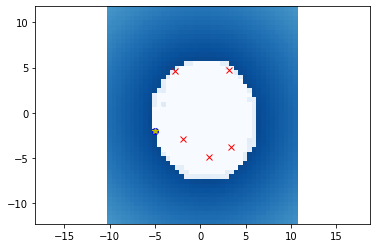

In [6]:
display(fig)